In [38]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [39]:
# -----------------------------
# Choose transform and models
# -----------------------------
transforms = ["log1p", "zscore", "clr"]
models = ["ChemBERTa", "MOLE", "Molformer", "SMI-TED289M"]

base_dir = Path("Sample_level_embeddings")

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

results = []

### Loop over transforms and models

In [40]:
for transform in transforms:
    print(f"\n==================== Transform: {transform} ====================")
    t_dir = base_dir / transform

    for model_name in models:
        print(f"\n--- Model: {model_name} ---")

        path = t_dir / f"{model_name}_sample_embeddings_classification.parquet"
        df = pd.read_parquet(path)

        print("Data shape:", df.shape)

        # Embeddings
        emb_cols = [c for c in df.columns if c.startswith("emb_")]
        X = df[emb_cols].to_numpy(dtype=float)

        # Diagnosis labels
        y_diag = df["Diagnosis"].to_numpy()

        print("X shape:", X.shape)
        print("y shape:", y_diag.shape)
        print("Unique diagnoses:", np.unique(y_diag))

        # ---------- Multiclass (UC / CD / Control) ----------
        le = LabelEncoder()
        y_multi = le.fit_transform(y_diag)
        print("Classes:", le.classes_)

        clf_multi = LogisticRegression(
            penalty="l2",
            C=0.1,
            max_iter=1000,
            multi_class="multinomial"
        )

        acc_multi = cross_val_score(
            clf_multi,
            X,
            y_multi,
            cv=cv,
            scoring="accuracy"
        )

        # ---------- Binary IBD vs Control ----------
        ibd = {"UC", "CD"}
        y_binary = np.array([1 if d in ibd else 0 for d in y_diag], dtype=int)

        clf_bin = LogisticRegression(
            penalty="l2",
            C=0.1,
            max_iter=1000
        )

        auc_bin = cross_val_score(
            clf_bin,
            X,
            y_binary,
            cv=cv,
            scoring="roc_auc"
        )

        print("Multiclass accuracy:", acc_multi.mean(), "±", acc_multi.std())
        print("Binary AUC:", auc_bin.mean(), "±", auc_bin.std())

        # Store results
        results.append({
            "transform": transform,
            "model": model_name,
            "n_samples": X.shape[0],
            "n_features": X.shape[1],
            "multiclass_acc_mean": acc_multi.mean(),
            "multiclass_acc_std": acc_multi.std(),
            "binary_auc_mean": auc_bin.mean(),
            "binary_auc_std": auc_bin.std(),
        })



==================== Transform: log1p ====================

--- Model: ChemBERTa ---
Data shape: (220, 770)
X shape: (220, 768)
y shape: (220,)
Unique diagnoses: ['CD' 'Control' 'UC']
Classes: ['CD' 'Control' 'UC']


/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in versio

Multiclass accuracy: 0.55 ± 0.08307121310225937
Binary AUC: 0.8281336088154271 ± 0.06842143525092911

--- Model: MOLE ---
Data shape: (220, 770)
X shape: (220, 768)
y shape: (220,)
Unique diagnoses: ['CD' 'Control' 'UC']
Classes: ['CD' 'Control' 'UC']


/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in versio

Multiclass accuracy: 0.5545454545454545 ± 0.07687061147858074
Binary AUC: 0.828254132231405 ± 0.05949776495432819

--- Model: Molformer ---
Data shape: (220, 770)
X shape: (220, 768)
y shape: (220,)
Unique diagnoses: ['CD' 'Control' 'UC']
Classes: ['CD' 'Control' 'UC']
Multiclass accuracy: 0.5136363636363636 ± 0.06523954588366965
Binary AUC: 0.8116864669421489 ± 0.056849452561253774

--- Model: SMI-TED289M ---


/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in versio

Data shape: (220, 770)
X shape: (220, 768)
y shape: (220,)
Unique diagnoses: ['CD' 'Control' 'UC']
Classes: ['CD' 'Control' 'UC']
Multiclass accuracy: 0.4 ± 0.0111340442853781
Binary AUC: 0.7865831611570248 ± 0.07108427763269866

==================== Transform: zscore ====================

--- Model: ChemBERTa ---
Data shape: (220, 770)
X shape: (220, 768)
y shape: (220,)
Unique diagnoses: ['CD' 'Control' 'UC']
Classes: ['CD' 'Control' 'UC']


/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in versio

Multiclass accuracy: 0.42272727272727273 ± 0.06982859770789644
Binary AUC: 0.7338326446280992 ± 0.06537950465645705

--- Model: MOLE ---
Data shape: (220, 770)
X shape: (220, 768)
y shape: (220,)
Unique diagnoses: ['CD' 'Control' 'UC']
Classes: ['CD' 'Control' 'UC']


/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in versio

Multiclass accuracy: 0.4590909090909091 ± 0.06492207662311683
Binary AUC: 0.7588068181818182 ± 0.05653334826770649

--- Model: Molformer ---
Data shape: (220, 770)
X shape: (220, 768)
y shape: (220,)
Unique diagnoses: ['CD' 'Control' 'UC']
Classes: ['CD' 'Control' 'UC']


/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in versio

Multiclass accuracy: 0.4045454545454545 ± 0.08790490729915325
Binary AUC: 0.7176954201101928 ± 0.06289442005834837

--- Model: SMI-TED289M ---
Data shape: (220, 770)
X shape: (220, 768)
y shape: (220,)
Unique diagnoses: ['CD' 'Control' 'UC']
Classes: ['CD' 'Control' 'UC']
Multiclass accuracy: 0.4 ± 0.0111340442853781
Binary AUC: 0.6601842286501378 ± 0.08720618528653386

==================== Transform: clr ====================

--- Model: ChemBERTa ---
Data shape: (220, 770)
X shape: (220, 768)
y shape: (220,)
Unique diagnoses: ['CD' 'Control' 'UC']
Classes: ['CD' 'Control' 'UC']


/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in versio

Multiclass accuracy: 0.5545454545454545 ± 0.04679831882266819
Binary AUC: 0.8152031680440771 ± 0.01884112371689262

--- Model: MOLE ---
Data shape: (220, 770)
X shape: (220, 768)
y shape: (220,)
Unique diagnoses: ['CD' 'Control' 'UC']
Classes: ['CD' 'Control' 'UC']


/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in versio

Multiclass accuracy: 0.5545454545454546 ± 0.04679831882266819
Binary AUC: 0.8134900137741047 ± 0.020285153300142782

--- Model: Molformer ---
Data shape: (220, 770)
X shape: (220, 768)
y shape: (220,)
Unique diagnoses: ['CD' 'Control' 'UC']
Classes: ['CD' 'Control' 'UC']
Multiclass accuracy: 0.5863636363636363 ± 0.05261744046722829
Binary AUC: 0.8010588842975206 ± 0.02644642110880293

--- Model: SMI-TED289M ---


/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in versio

Data shape: (220, 770)
X shape: (220, 768)
y shape: (220,)
Unique diagnoses: ['CD' 'Control' 'UC']
Classes: ['CD' 'Control' 'UC']
Multiclass accuracy: 0.4 ± 0.0111340442853781
Binary AUC: 0.7792312327823692 ± 0.030270045724175614


In [41]:
results_df = pd.DataFrame(results)

print("\n\n==================== SUMMARY TABLE ====================")
print(results_df)

# If you want it sorted by best multiclass accuracy:
print("\nSorted by multiclass accuracy (desc):")
print(results_df.sort_values("multiclass_acc_mean", ascending=False))

# Or sorted by best binary AUC:
print("\nSorted by binary AUC (desc):")
print(results_df.sort_values("binary_auc_mean", ascending=False))



==================== SUMMARY TABLE ====================
   transform        model  n_samples  n_features  multiclass_acc_mean  \
0      log1p    ChemBERTa        220         768             0.550000   
1      log1p         MOLE        220         768             0.554545   
2      log1p    Molformer        220         768             0.513636   
3      log1p  SMI-TED289M        220         768             0.400000   
4     zscore    ChemBERTa        220         768             0.422727   
5     zscore         MOLE        220         768             0.459091   
6     zscore    Molformer        220         768             0.404545   
7     zscore  SMI-TED289M        220         768             0.400000   
8        clr    ChemBERTa        220         768             0.554545   
9        clr         MOLE        220         768             0.554545   
10       clr    Molformer        220         768             0.586364   
11       clr  SMI-TED289M        220         768             0.400

### Multiclass table

In [42]:
# Make a pretty multiclass accuracy table: mean ± std, rounded
multi_table = results_df.copy()

multi_table["multiclass_acc"] = (
    multi_table["multiclass_acc_mean"].round(3).astype(str)
    + " ± "
    + multi_table["multiclass_acc_std"].round(3).astype(str)
)

multi_pivot = multi_table.pivot(
    index="model",
    columns="transform",
    values="multiclass_acc"
)

print("\nMulticlass accuracy (mean ± std):")
print(multi_pivot.to_string())


Multiclass accuracy (mean ± std):
transform              clr          log1p         zscore
model                                                   
ChemBERTa    0.555 ± 0.047   0.55 ± 0.083   0.423 ± 0.07
MOLE         0.555 ± 0.047  0.555 ± 0.077  0.459 ± 0.065
Molformer    0.586 ± 0.053  0.514 ± 0.065  0.405 ± 0.088
SMI-TED289M    0.4 ± 0.011    0.4 ± 0.011    0.4 ± 0.011


### Binary plot

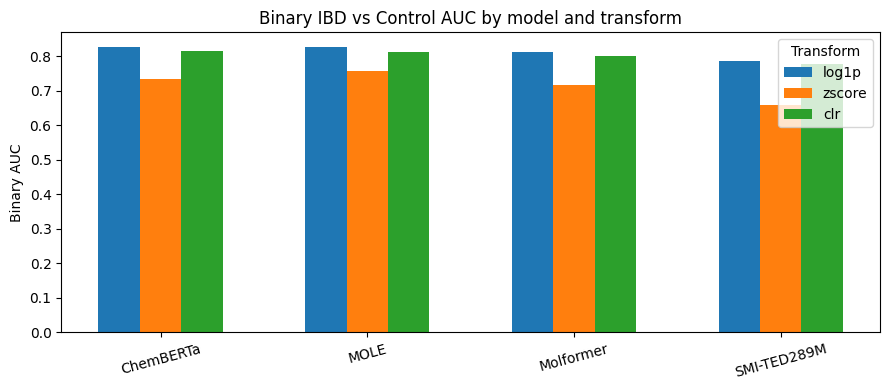

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Use all models in results_df (ChemBERTa, MOLE, Molformer, SMI-TED289M)
models = results_df["model"].unique().tolist()
transforms = ["log1p", "zscore", "clr"]

# Choose which metric to plot:
#   "binary_auc_mean"      -> logistic regression
#   "mlp_binary_auc_mean"  -> MLP (if you ran the extended loop)
auc_field = "binary_auc_mean"

# Prepare matrix of AUCs: rows = models, cols = transforms
auc_matrix = np.zeros((len(models), len(transforms)))

for i, model in enumerate(models):
    for j, transform in enumerate(transforms):
        row = results_df[
            (results_df["model"] == model) &
            (results_df["transform"] == transform)
        ].iloc[0]
        auc_matrix[i, j] = row[auc_field]

# Plot
x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(9, 4))

for j, transform in enumerate(transforms):
    ax.bar(
        x + j * width,
        auc_matrix[:, j],
        width,
        label=transform,
    )

ax.set_xticks(x + width)
ax.set_xticklabels(models, rotation=15)
ax.set_ylabel("Binary AUC")
ax.set_title("Binary IBD vs Control AUC by model and transform")
ax.legend(title="Transform")
plt.tight_layout()
plt.show()


### --- Comparing LR and MLP ----

Across all transformations and embeddings


In [1]:
import numpy as np
import pandas as pd
from pathlib import Path

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

# -----------------------------
# Config
# -----------------------------
transforms = ["log1p", "zscore", "clr"]
models = ["ChemBERTa", "MOLE", "Molformer", "SMI-TED289M"]  # <- added SMI-TED289M

base_dir = Path("Sample_level_embeddings")

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

results = []

# -----------------------------
# Loop over transforms and models
# -----------------------------
for transform in transforms:
    print(f"\n==================== Transform: {transform} ====================")
    t_dir = base_dir / transform

    for model_name in models:
        print(f"\n--- Model: {model_name} ---")

        path = t_dir / f"{model_name}_sample_embeddings_classification.parquet"
        df = pd.read_parquet(path)

        print("Data shape:", df.shape)

        # Embeddings
        emb_cols = [c for c in df.columns if c.startswith("emb_")]
        X = df[emb_cols].to_numpy(dtype=float)

        # Diagnosis labels
        y_diag = df["Diagnosis"].to_numpy()

        print("X shape:", X.shape)
        print("y shape:", y_diag.shape)
        print("Unique diagnoses:", np.unique(y_diag))

        # ---------- Multiclass (UC / CD / Control) ----------
        le = LabelEncoder()
        y_multi = le.fit_transform(y_diag)
        print("Classes:", le.classes_)

        # ---------- Binary IBD vs Control ----------
        ibd = {"UC", "CD"}
        y_binary = np.array([1 if d in ibd else 0 for d in y_diag], dtype=int)

        # ===================== LOGISTIC REGRESSION =====================

        clf_multi_lr = LogisticRegression(
            penalty="l2",
            C=0.1,
            max_iter=1000,
            multi_class="multinomial"
        )

        acc_multi_lr = cross_val_score(
            clf_multi_lr,
            X,
            y_multi,
            cv=cv,
            scoring="accuracy"
        )

        clf_bin_lr = LogisticRegression(
            penalty="l2",
            C=0.1,
            max_iter=1000
        )

        auc_bin_lr = cross_val_score(
            clf_bin_lr,
            X,
            y_binary,
            cv=cv,
            scoring="roc_auc"
        )

        # ===================== MLP =====================

        clf_multi_mlp = MLPClassifier(
            hidden_layer_sizes=(64,),   # small 1-layer MLP
            activation="relu",
            alpha=1e-3,                 # L2 regularization
            max_iter=2000,
            random_state=0
        )

        acc_multi_mlp = cross_val_score(
            clf_multi_mlp,
            X,
            y_multi,
            cv=cv,
            scoring="accuracy"
        )

        clf_bin_mlp = MLPClassifier(
            hidden_layer_sizes=(64,),
            activation="relu",
            alpha=1e-3,
            max_iter=2000,
            random_state=0
        )

        auc_bin_mlp = cross_val_score(
            clf_bin_mlp,
            X,
            y_binary,
            cv=cv,
            scoring="roc_auc"
        )

        print("MULTICLASS accuracy LR :", acc_multi_lr.mean(),  "±", acc_multi_lr.std())
        print("MULTICLASS accuracy MLP:", acc_multi_mlp.mean(), "±", acc_multi_mlp.std())
        print("BINARY AUC LR          :", auc_bin_lr.mean(),    "±", auc_bin_lr.std())
        print("BINARY AUC MLP         :", auc_bin_mlp.mean(),   "±", auc_bin_mlp.std())

        # Store results
        results.append({
            "transform": transform,
            "model": model_name,
            "n_samples": X.shape[0],
            "n_features": X.shape[1],

            "lr_multiclass_acc_mean":  acc_multi_lr.mean(),
            "lr_multiclass_acc_std":   acc_multi_lr.std(),
            "lr_binary_auc_mean":      auc_bin_lr.mean(),
            "lr_binary_auc_std":       auc_bin_lr.std(),

            "mlp_multiclass_acc_mean": acc_multi_mlp.mean(),
            "mlp_multiclass_acc_std":  acc_multi_mlp.std(),
            "mlp_binary_auc_mean":     auc_bin_mlp.mean(),
            "mlp_binary_auc_std":      auc_bin_mlp.std(),
        })



==================== Transform: log1p ====================

--- Model: ChemBERTa ---
Data shape: (220, 770)
X shape: (220, 768)
y shape: (220,)
Unique diagnoses: ['CD' 'Control' 'UC']
Classes: ['CD' 'Control' 'UC']


/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in versio

MULTICLASS accuracy LR : 0.55 ± 0.08307121310225937
MULTICLASS accuracy MLP: 0.5954545454545455 ± 0.09022469655126912
BINARY AUC LR          : 0.8281336088154271 ± 0.06842143525092911
BINARY AUC MLP         : 0.8635244490358126 ± 0.03955774201286846

--- Model: MOLE ---
Data shape: (220, 770)
X shape: (220, 768)
y shape: (220,)
Unique diagnoses: ['CD' 'Control' 'UC']
Classes: ['CD' 'Control' 'UC']


/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in versio

MULTICLASS accuracy LR : 0.5545454545454545 ± 0.07687061147858074
MULTICLASS accuracy MLP: 0.6045454545454546 ± 0.07820295697311479
BINARY AUC LR          : 0.828254132231405 ± 0.05949776495432819
BINARY AUC MLP         : 0.8555612947658402 ± 0.052560901041259676

--- Model: Molformer ---
Data shape: (220, 770)
X shape: (220, 768)
y shape: (220,)
Unique diagnoses: ['CD' 'Control' 'UC']
Classes: ['CD' 'Control' 'UC']


/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in versio

MULTICLASS accuracy LR : 0.5136363636363636 ± 0.06523954588366965
MULTICLASS accuracy MLP: 0.6318181818181818 ± 0.1050383637117395
BINARY AUC LR          : 0.8116864669421489 ± 0.056849452561253774
BINARY AUC MLP         : 0.8735321969696969 ± 0.02575236304122556

--- Model: SMI-TED289M ---
Data shape: (220, 770)
X shape: (220, 768)
y shape: (220,)
Unique diagnoses: ['CD' 'Control' 'UC']
Classes: ['CD' 'Control' 'UC']


/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in versio

MULTICLASS accuracy LR : 0.4 ± 0.0111340442853781
MULTICLASS accuracy MLP: 0.540909090909091 ± 0.08430562268632458
BINARY AUC LR          : 0.7865831611570248 ± 0.07108427763269866
BINARY AUC MLP         : 0.8447529269972452 ± 0.049913559206736166

==================== Transform: zscore ====================

--- Model: ChemBERTa ---
Data shape: (220, 770)
X shape: (220, 768)
y shape: (220,)
Unique diagnoses: ['CD' 'Control' 'UC']
Classes: ['CD' 'Control' 'UC']


/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in versio

MULTICLASS accuracy LR : 0.42272727272727273 ± 0.06982859770789644
MULTICLASS accuracy MLP: 0.48636363636363633 ± 0.023177361425421743
BINARY AUC LR          : 0.7338326446280992 ± 0.06537950465645705
BINARY AUC MLP         : 0.8057851239669421 ± 0.06163661752163547

--- Model: MOLE ---
Data shape: (220, 770)
X shape: (220, 768)
y shape: (220,)
Unique diagnoses: ['CD' 'Control' 'UC']
Classes: ['CD' 'Control' 'UC']


/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in versio

MULTICLASS accuracy LR : 0.4590909090909091 ± 0.06492207662311683
MULTICLASS accuracy MLP: 0.4954545454545455 ± 0.10984587248722337
BINARY AUC LR          : 0.7588068181818182 ± 0.05653334826770649
BINARY AUC MLP         : 0.8125473484848484 ± 0.07587200663417326

--- Model: Molformer ---
Data shape: (220, 770)
X shape: (220, 768)
y shape: (220,)
Unique diagnoses: ['CD' 'Control' 'UC']
Classes: ['CD' 'Control' 'UC']


/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in versio

MULTICLASS accuracy LR : 0.4045454545454545 ± 0.08790490729915325
MULTICLASS accuracy MLP: 0.4909090909090909 ± 0.048956043701222744
BINARY AUC LR          : 0.7176954201101928 ± 0.06289442005834837
BINARY AUC MLP         : 0.8150309917355372 ± 0.07000282177798153

--- Model: SMI-TED289M ---
Data shape: (220, 770)
X shape: (220, 768)
y shape: (220,)
Unique diagnoses: ['CD' 'Control' 'UC']
Classes: ['CD' 'Control' 'UC']


/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in versio

MULTICLASS accuracy LR : 0.4 ± 0.0111340442853781
MULTICLASS accuracy MLP: 0.3909090909090909 ± 0.05061603966209112
BINARY AUC LR          : 0.6601842286501378 ± 0.08720618528653386
BINARY AUC MLP         : 0.751553891184573 ± 0.04290314480043223

==================== Transform: clr ====================

--- Model: ChemBERTa ---
Data shape: (220, 770)
X shape: (220, 768)
y shape: (220,)
Unique diagnoses: ['CD' 'Control' 'UC']
Classes: ['CD' 'Control' 'UC']


/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in versio

MULTICLASS accuracy LR : 0.5545454545454545 ± 0.04679831882266819
MULTICLASS accuracy MLP: 0.5954545454545455 ± 0.07524066071475842
BINARY AUC LR          : 0.8152031680440771 ± 0.01884112371689262
BINARY AUC MLP         : 0.8665203168044078 ± 0.02799940954795361

--- Model: MOLE ---
Data shape: (220, 770)
X shape: (220, 768)
y shape: (220,)
Unique diagnoses: ['CD' 'Control' 'UC']
Classes: ['CD' 'Control' 'UC']


/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in versio

MULTICLASS accuracy LR : 0.5545454545454546 ± 0.04679831882266819
MULTICLASS accuracy MLP: 0.5818181818181818 ± 0.07687061147858075
BINARY AUC LR          : 0.8134900137741047 ± 0.020285153300142782
BINARY AUC MLP         : 0.8210012052341596 ± 0.05068554774163967

--- Model: Molformer ---
Data shape: (220, 770)
X shape: (220, 768)
y shape: (220,)
Unique diagnoses: ['CD' 'Control' 'UC']
Classes: ['CD' 'Control' 'UC']


/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in versio

MULTICLASS accuracy LR : 0.5863636363636363 ± 0.05261744046722829
MULTICLASS accuracy MLP: 0.6272727272727273 ± 0.08331955809010619
BINARY AUC LR          : 0.8010588842975206 ± 0.02644642110880293
BINARY AUC MLP         : 0.8547090220385674 ± 0.04112848033077378

--- Model: SMI-TED289M ---
Data shape: (220, 770)
X shape: (220, 768)
y shape: (220,)
Unique diagnoses: ['CD' 'Control' 'UC']
Classes: ['CD' 'Control' 'UC']


/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in versio

MULTICLASS accuracy LR : 0.4 ± 0.0111340442853781
MULTICLASS accuracy MLP: 0.55 ± 0.052617440467228306
BINARY AUC LR          : 0.7792312327823692 ± 0.030270045724175614
BINARY AUC MLP         : 0.8049457644628099 ± 0.02215920629501123


### Summary table

In [2]:
# -----------------------------
# Summary table
# -----------------------------
results_df = pd.DataFrame(results)

print("\n\n==================== FULL SUMMARY ====================")
print(results_df)

# -----------------------------
# Sorted views
# -----------------------------

print("\nSorted by MLP binary AUC (desc):")
print(
    results_df
    .sort_values("mlp_binary_auc_mean", ascending=False)
    .reset_index(drop=True)
)

print("\nSorted by LR binary AUC (desc):")
print(
    results_df
    .sort_values("lr_binary_auc_mean", ascending=False)
    .reset_index(drop=True)
)




==================== FULL SUMMARY ====================
   transform        model  n_samples  n_features  lr_multiclass_acc_mean  \
0      log1p    ChemBERTa        220         768                0.550000   
1      log1p         MOLE        220         768                0.554545   
2      log1p    Molformer        220         768                0.513636   
3      log1p  SMI-TED289M        220         768                0.400000   
4     zscore    ChemBERTa        220         768                0.422727   
5     zscore         MOLE        220         768                0.459091   
6     zscore    Molformer        220         768                0.404545   
7     zscore  SMI-TED289M        220         768                0.400000   
8        clr    ChemBERTa        220         768                0.554545   
9        clr         MOLE        220         768                0.554545   
10       clr    Molformer        220         768                0.586364   
11       clr  SMI-TED289M      

In [3]:
# Make a copy to avoid modifying results_df
tbl = results_df.copy()

# Create formatted columns for easier comparison
tbl["LR_multiclass"] = (
    tbl["lr_multiclass_acc_mean"].round(3).astype(str)
    + " ± "
    + tbl["lr_multiclass_acc_std"].round(3).astype(str)
)

tbl["MLP_multiclass"] = (
    tbl["mlp_multiclass_acc_mean"].round(3).astype(str)
    + " ± "
    + tbl["mlp_multiclass_acc_std"].round(3).astype(str)
)

tbl["LR_binary"] = (
    tbl["lr_binary_auc_mean"].round(3).astype(str)
    + " ± "
    + tbl["lr_binary_auc_std"].round(3).astype(str)
)

tbl["MLP_binary"] = (
    tbl["mlp_binary_auc_mean"].round(3).astype(str)
    + " ± "
    + tbl["mlp_binary_auc_std"].round(3).astype(str)
)

# Columns to display
compare_cols = [
    "transform",
    "model",
    "LR_multiclass",
    "MLP_multiclass",
    "LR_binary",
    "MLP_binary",
]

comparison_table = tbl[compare_cols]

print("\n===== MLP vs Logistic Regression (Side-by-Side) =====\n")
print(comparison_table.to_string(index=False))



===== MLP vs Logistic Regression (Side-by-Side) =====

transform       model LR_multiclass MLP_multiclass     LR_binary    MLP_binary
    log1p   ChemBERTa  0.55 ± 0.083   0.595 ± 0.09 0.828 ± 0.068  0.864 ± 0.04
    log1p        MOLE 0.555 ± 0.077  0.605 ± 0.078 0.828 ± 0.059 0.856 ± 0.053
    log1p   Molformer 0.514 ± 0.065  0.632 ± 0.105 0.812 ± 0.057 0.874 ± 0.026
    log1p SMI-TED289M   0.4 ± 0.011  0.541 ± 0.084 0.787 ± 0.071  0.845 ± 0.05
   zscore   ChemBERTa  0.423 ± 0.07  0.486 ± 0.023 0.734 ± 0.065 0.806 ± 0.062
   zscore        MOLE 0.459 ± 0.065   0.495 ± 0.11 0.759 ± 0.057 0.813 ± 0.076
   zscore   Molformer 0.405 ± 0.088  0.491 ± 0.049 0.718 ± 0.063  0.815 ± 0.07
   zscore SMI-TED289M   0.4 ± 0.011  0.391 ± 0.051  0.66 ± 0.087 0.752 ± 0.043
      clr   ChemBERTa 0.555 ± 0.047  0.595 ± 0.075 0.815 ± 0.019 0.867 ± 0.028
      clr        MOLE 0.555 ± 0.047  0.582 ± 0.077  0.813 ± 0.02 0.821 ± 0.051
      clr   Molformer 0.586 ± 0.053  0.627 ± 0.083 0.801 ± 0.026 0.855 ± 0.

### Binary plot